# Importação do banco de dados (*atualizado*)

In [35]:
#install.packages("readxl")
require(readxl)
bd<- read_excel("Analise heitor_02_10_21.xlsx",sheet = 2)
head(bd)
dim(bd) #72x40 (antes - 71 variáveis)
str(bd)

Caidor,Genero,idade,Nivel_social,etnia,Nivel_educacional,Freq_atividade,Criterio_AHA,Anti_hipertensivo,betabloqueador,...,Dinamometria,Berg,STS,Flexibilidade_Ms,Flexibilidade_MI,TUG_sec,DT_Sec,DT_numero_animais,quantidade_total_de_medicação,medicaçao_tipo_cardiovascular
<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
sim,mulher,76,b,branco,16,3x,c,não,sim,...,17.9,54,5,-29,-33,8.90,9.1,10,8,Beta + Anti_Coag
não,mulher,73,b,branco,16,3x,b,sim,sim,...,21.0,56,12,0,0,7.11,9.0,8,8,Beta + Anti_HAS
não,mulher,75,c,branco,12,2x,b,sim,sim,...,23.5,54,7,-7,-15,7.42,8.6,7,6,Beta + Anti_Coag
sim,mulher,83,b,branco,10,sedentario,c,sim,sim,...,15.3,51,9,-22,-4,10.52,11.9,7,8,Beta + Anti_Coag + Diu
não,mulher,83,a,branco,10,3x,c,sim,sim,...,16.7,56,NA,NA,-19,9.31,13.2,9,7,Beta + Anti_Coag + Diu
não,mulher,78,a,branco,12,2x,b,sim,sim,...,19.1,56,12,NA,0,7.17,8.7,6,4,Beta + Anti_HAS


[1] 72 40

tibble [72 x 40] (S3: tbl_df/tbl/data.frame)
 $ Caidor                       : chr [1:72] "sim" "não" "não" "sim" ...
 $ Genero                       : chr [1:72] "mulher" "mulher" "mulher" "mulher" ...
 $ idade                        : num [1:72] 76 73 75 83 83 78 83 82 78 75 ...
 $ Nivel_social                 : chr [1:72] "b" "b" "c" "b" ...
 $ etnia                        : chr [1:72] "branco" "branco" "branco" "branco" ...
 $ Nivel_educacional            : num [1:72] 16 16 12 10 10 12 20 8 14 16 ...
 $ Freq_atividade               : chr [1:72] "3x" "3x" "2x" "sedentario" ...
 $ Criterio_AHA                 : chr [1:72] "c" "b" "b" "c" ...
 $ Anti_hipertensivo            : chr [1:72] "não" "sim" "sim" "sim" ...
 $ betabloqueador               : chr [1:72] "sim" "sim" "sim" "sim" ...
 $ Anticoagulante_classif       : chr [1:72] "não" "não" "não" "sim" ...
 $ Diuretico_classif            : chr [1:72] "não" "não" "não" "sim" ...
 $ medicação_tipo_mental        : chr [1:72] "antidepres

# Pré-processamento dos dados

In [36]:
#bd[] <- lapply(bd, as.factor) #Transforma todo o banco de dados em fator

bd[,c("Caidor","Genero","Nivel_social","etnia","Freq_atividade","Criterio_AHA","Anti_hipertensivo","betabloqueador","Anticoagulante_classif",
    "Diuretico_classif","medicação_tipo_mental","medicação_tipo_saude","antidepressivo","ansiolitico","benzodiazepinico","DVC_primaria",
    "HAS","Doenca_Respi","medicaçao_tipo_cardiovascular")]<- lapply(bd[,c("Caidor","Genero","Nivel_social","etnia","Freq_atividade","Criterio_AHA","Anti_hipertensivo","betabloqueador","Anticoagulante_classif",
    "Diuretico_classif","medicação_tipo_mental","medicação_tipo_saude","antidepressivo","ansiolitico","benzodiazepinico","DVC_primaria",
    "HAS","Doenca_Respi","medicaçao_tipo_cardiovascular")],as.factor)

str(bd) #Sim=2 (classe negativa)

tibble [72 x 40] (S3: tbl_df/tbl/data.frame)
 $ Caidor                       : Factor w/ 2 levels "não","sim": 2 1 1 2 1 1 2 1 1 2 ...
 $ Genero                       : Factor w/ 2 levels "homem","mulher": 2 2 2 2 2 2 2 2 2 1 ...
 $ idade                        : num [1:72] 76 73 75 83 83 78 83 82 78 75 ...
 $ Nivel_social                 : Factor w/ 4 levels "a","b","c","d": 2 2 3 2 1 1 2 2 3 2 ...
 $ etnia                        : Factor w/ 2 levels "branco","preto": 1 1 1 1 1 1 2 1 1 1 ...
 $ Nivel_educacional            : num [1:72] 16 16 12 10 10 12 20 8 14 16 ...
 $ Freq_atividade               : Factor w/ 3 levels "2x","3x","sedentario": 2 2 1 3 2 1 2 1 1 1 ...
 $ Criterio_AHA                 : Factor w/ 2 levels "b","c": 2 1 1 2 2 1 2 1 1 2 ...
 $ Anti_hipertensivo            : Factor w/ 2 levels "não","sim": 1 2 2 2 2 2 1 1 1 2 ...
 $ betabloqueador               : Factor w/ 2 levels "não","sim": 2 2 2 2 2 2 2 1 2 2 ...
 $ Anticoagulante_classif       : Factor w/ 2 levels "não

In [37]:
#Alterando a classe de referência (não -> sim) #Sim=1
bd2 <- within(bd, Caidor <- relevel(Caidor, ref = "sim")) 
str(bd2$Caidor)

 Factor w/ 2 levels "sim","não": 1 2 2 1 2 2 1 2 2 1 ...


## Removendo dados faltantes

In [38]:
table(bd2$Caidor) #(24 sim e 48 não)
BD<- na.omit(bd2) 
dim(BD) #52 idosos após remoção dos Nas
table(BD$Caidor) #(19 sim e 33 não)


sim não 
 24  48 

[1] 52 40


sim não 
 19  33 

# Análise descritiva (*n total - com NA*) 

## N total (casos e controles)

In [104]:
#Mínimo, máximo, média, mediana e intervalo quartil das variáveis (numéricas)
sapply(bd2,summary)
#Desvio padrão
sapply(bd2[,c("idade","Nivel_educacional","Tempo_doença","MMSE","Fluencia_verbal","Trilhas_A","Trilhas_b","GDS","FES_I","Vsaq","Vo2_maximo_avaliado","IMC","Dinamometria","Berg","STS","Flexibilidade_Ms","Flexibilidade_MI","TUG_sec","DT_Sec","DT_numero_animais","quantidade_total_de_medicação")],sd,na.rm = TRUE)

$Caidor
sim não 
 24  48 

$Genero
 homem mulher 
    43     29 

$idade
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  60.00   69.00   75.00   74.51   79.25   92.00 

$Nivel_social
 a  b  c  d 
12 43 16  1 

$etnia
branco  preto 
    61     11 

$Nivel_educacional
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   8.00   14.00   16.00   15.64   16.50   24.00 

$Freq_atividade
        2x         3x sedentario 
        21         34         17 

$Criterio_AHA
 b  c 
49 23 

$Anti_hipertensivo
não sim 
 15  57 

$betabloqueador
não sim 
  6  66 

$Anticoagulante_classif
não sim 
 41  31 

$Diuretico_classif
não sim 
 48  24 

$medicação_tipo_mental
         ansiolitico       antidepressivo antidepressivo+benzo 
                   2                    5                    8 
    benzodiazepinico                  não 
                  28                   29 

$medicação_tipo_saude
 cardio+mental cardiovascular 
            43             29 

$antidepressivo
não sim 
 61  11 

$ansi

idade             Nivel_educacional 
                     6.881273                      3.632039 
                 Tempo_doença                          MMSE 
                     7.080965                      1.868407 
              Fluencia_verbal                     Trilhas_A 
                     5.636744                     20.295916 
                    Trilhas_b                           GDS 
                    71.641108                      5.745053 
                        FES_I                          Vsaq 
                     6.049760                      1.618010 
          Vo2_maximo_avaliado                           IMC 
                     4.239289                      3.983717 
                 Dinamometria                          Berg 
                     8.952009                      3.727174 
                          STS              Flexibilidade_Ms 
                     3.247880                     11.883320 
             Flexibilidade_MI                       TUG_sec 
                    10.609436                      1.559011 
                       DT_Sec             DT_numero_animais 
                     2.668524                      1.844288 
quantidade_total_de_medicação 
                     2.444653

In [70]:
#Exportando bd2 em csv
write.table(bd2, file='Dataset usado para a analise descritiva_24022022.csv', sep=';', dec=',', row.names=FALSE)

## Casos x controles

In [42]:
controle<- grep("não",bd2$Caidor)
caso<- grep("sim",bd2$Caidor)
bd_controle<- bd2[controle,]
bd_caso<- bd2[caso,]
dim(bd_controle)
dim(bd_caso)

#Mínimo, máximo, média, mediana e intervalo quartil das variáveis (numéricas)
sapply(bd_controle,summary)
sapply(bd_caso,summary)

[1] 48 40

[1] 24 40

$Caidor
sim não 
  0  48 

$Genero
 homem mulher 
    28     20 

$idade
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  60.00   67.75   73.00   73.17   79.00   86.00 

$Nivel_social
 a  b  c  d 
 9 28 11  0 

$etnia
branco  preto 
    42      6 

$Nivel_educacional
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   8.00   14.00   16.00   15.92   16.50   24.00 

$Freq_atividade
        2x         3x sedentario 
        11         24         13 

$Criterio_AHA
 b  c 
39  9 

$Anti_hipertensivo
não sim 
  8  40 

$betabloqueador
não sim 
  6  42 

$Anticoagulante_classif
não sim 
 36  12 

$Diuretico_classif
não sim 
 38  10 

$medicação_tipo_mental
         ansiolitico       antidepressivo antidepressivo+benzo 
                   1                    3                    4 
    benzodiazepinico                  não 
                  15                   25 

$medicação_tipo_saude
 cardio+mental cardiovascular 
            23             25 

$antidepressivo
não sim 
 43   5 

$ansi

$Caidor
sim não 
 24   0 

$Genero
 homem mulher 
    15      9 

$idade
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  65.00   74.00   76.50   77.21   81.25   92.00 

$Nivel_social
 a  b  c  d 
 3 15  5  1 

$etnia
branco  preto 
    19      5 

$Nivel_educacional
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   8.00   12.00   16.00   15.08   16.50   22.00 

$Freq_atividade
        2x         3x sedentario 
        10         10          4 

$Criterio_AHA
 b  c 
10 14 

$Anti_hipertensivo
não sim 
  7  17 

$betabloqueador
não sim 
  0  24 

$Anticoagulante_classif
não sim 
  5  19 

$Diuretico_classif
não sim 
 10  14 

$medicação_tipo_mental
         ansiolitico       antidepressivo antidepressivo+benzo 
                   1                    2                    4 
    benzodiazepinico                  não 
                  13                    4 

$medicação_tipo_saude
 cardio+mental cardiovascular 
            20              4 

$antidepressivo
não sim 
 18   6 

$ansi

In [105]:
#Desvio padrão
sapply(bd_controle[,c("idade","Nivel_educacional","Tempo_doença","MMSE","Fluencia_verbal","Trilhas_A","Trilhas_b","GDS","FES_I","Vsaq","Vo2_maximo_avaliado","IMC","Dinamometria","Berg","STS","Flexibilidade_Ms","Flexibilidade_MI","TUG_sec","DT_Sec","DT_numero_animais","quantidade_total_de_medicação")],sd,na.rm = TRUE)
sapply(bd_caso[,c("idade","Nivel_educacional","Tempo_doença","MMSE","Fluencia_verbal","Trilhas_A","Trilhas_b","GDS","FES_I","Vsaq","Vo2_maximo_avaliado","IMC","Dinamometria","Berg","STS","Flexibilidade_Ms","Flexibilidade_MI","TUG_sec","DT_Sec","DT_numero_animais","quantidade_total_de_medicação")],sd,na.rm = TRUE)

idade             Nivel_educacional 
                     7.038899                      3.542047 
                 Tempo_doença                          MMSE 
                     7.307549                      1.530147 
              Fluencia_verbal                     Trilhas_A 
                     5.825476                     15.116959 
                    Trilhas_b                           GDS 
                    52.050594                      5.884645 
                        FES_I                          Vsaq 
                     4.652494                      1.522875 
          Vo2_maximo_avaliado                           IMC 
                     4.255496                      3.542732 
                 Dinamometria                          Berg 
                     8.873372                      2.638705 
                          STS              Flexibilidade_Ms 
                     3.309460                     12.872645 
             Flexibilidade_MI                       TUG_sec 
                    11.500437                      1.480703 
                       DT_Sec             DT_numero_animais 
                     2.331027                      1.693741 
quantidade_total_de_medicação 
                     2.468866

idade             Nivel_educacional 
                     5.793393                      3.821184 
                 Tempo_doença                          MMSE 
                     6.593667                      2.358687 
              Fluencia_verbal                     Trilhas_A 
                     4.561774                     26.892289 
                    Trilhas_b                           GDS 
                    86.898451                      5.437224 
                        FES_I                          Vsaq 
                     7.608991                      1.752328 
          Vo2_maximo_avaliado                           IMC 
                     3.287878                      4.822674 
                 Dinamometria                          Berg 
                     9.040136                      4.768366 
                          STS              Flexibilidade_Ms 
                     2.831919                      9.980500 
             Flexibilidade_MI                       TUG_sec 
                     8.964907                      1.518367 
                       DT_Sec             DT_numero_animais 
                     2.901973                      2.119612 
quantidade_total_de_medicação 
                     2.307832

# Testes de normalidade, de homocedasticidade, X², t-test e Mann-Whitney U (*n total - com NA*) 

## Teste kolmogorov-Smirnov

In [45]:
#var_numericas<- c("idade","Nivel_educacional","Tempo_doença","MMSE","Fluencia_verbal","Trilhas_A","Trilhas_b",
#"GDS","FES_I","Vsaq","Vo2_maximo_avaliado","IMC","Dinamometria","Berg","STS","Flexibilidade_Ms","Flexibilidade_MI",
#"TUG_sec","DT_Sec","DT_numero_animais","quantidade_total_de_medicação")

#Pvalor significante = sim
ks.test(bd_controle$idade,bd_caso$idade) #Sim
ks.test(bd_controle$Nivel_educacional,bd_caso$Nivel_educacional) #Não
ks.test(bd_controle$Tempo_doença,bd_caso$Tempo_doença) #Não
ks.test(bd_controle$MMSE,bd_caso$MMSE) #Não
ks.test(bd_controle$Fluencia_verbal,bd_caso$Fluencia_verbal) #Sim
ks.test(bd_controle$Trilhas_A,bd_caso$Trilhas_A) #Não
ks.test(bd_controle$Trilhas_b,bd_caso$Trilhas_b) #Sim
ks.test(bd_controle$GDS,bd_caso$GDS) #Não
ks.test(bd_controle$FES_I,bd_caso$FES_I) #Não
ks.test(bd_controle$Vsaq,bd_caso$Vsaq) #Não
ks.test(bd_controle$Vo2_maximo_avaliado,bd_caso$Vo2_maximo_avaliado) #Sim
ks.test(bd_controle$IMC,bd_caso$IMC) #Não
ks.test(bd_controle$Dinamometria,bd_caso$Dinamometria) #Não
ks.test(bd_controle$Berg,bd_caso$Berg) #Sim
ks.test(bd_controle$STS,bd_caso$STS) #Não
ks.test(bd_controle$Flexibilidade_Ms,bd_caso$Flexibilidade_Ms) #Não
ks.test(bd_controle$Flexibilidade_MI,bd_caso$Flexibilidade_MI) #Não
ks.test(bd_controle$TUG_sec,bd_caso$TUG_sec) #Não
ks.test(bd_controle$DT_Sec,bd_caso$DT_Sec) #Sim
ks.test(bd_controle$DT_numero_animais,bd_caso$DT_numero_animais) #Não
ks.test(bd_controle$quantidade_total_de_medicação,bd_caso$quantidade_total_de_medicação) #Não


Warning message in ks.test(bd_controle$idade, bd_caso$idade):
"cannot compute exact p-value with ties"



	Two-sample Kolmogorov-Smirnov test

data:  bd_controle$idade and bd_caso$idade
D = 0.375, p-value = 0.02222
alternative hypothesis: two-sided


Warning message in ks.test(bd_controle$Nivel_educacional, bd_caso$Nivel_educacional):
"cannot compute exact p-value with ties"



	Two-sample Kolmogorov-Smirnov test

data:  bd_controle$Nivel_educacional and bd_caso$Nivel_educacional
D = 0.16667, p-value = 0.7658
alternative hypothesis: two-sided


Warning message in ks.test(bd_controle$Tempo_doença, bd_caso$Tempo_doença):
"cannot compute exact p-value with ties"



	Two-sample Kolmogorov-Smirnov test

data:  bd_controle$Tempo_doença and bd_caso$Tempo_doença
D = 0.29167, p-value = 0.1314
alternative hypothesis: two-sided


Warning message in ks.test(bd_controle$MMSE, bd_caso$MMSE):
"cannot compute exact p-value with ties"



	Two-sample Kolmogorov-Smirnov test

data:  bd_controle$MMSE and bd_caso$MMSE
D = 0.18617, p-value = 0.6406
alternative hypothesis: two-sided


Warning message in ks.test(bd_controle$Fluencia_verbal, bd_caso$Fluencia_verbal):
"cannot compute exact p-value with ties"



	Two-sample Kolmogorov-Smirnov test

data:  bd_controle$Fluencia_verbal and bd_caso$Fluencia_verbal
D = 0.39583, p-value = 0.01329
alternative hypothesis: two-sided


Warning message in ks.test(bd_controle$Trilhas_A, bd_caso$Trilhas_A):
"cannot compute exact p-value with ties"



	Two-sample Kolmogorov-Smirnov test

data:  bd_controle$Trilhas_A and bd_caso$Trilhas_A
D = 0.22429, p-value = 0.4011
alternative hypothesis: two-sided


Warning message in ks.test(bd_controle$Trilhas_b, bd_caso$Trilhas_b):
"cannot compute exact p-value with ties"



	Two-sample Kolmogorov-Smirnov test

data:  bd_controle$Trilhas_b and bd_caso$Trilhas_b
D = 0.45035, p-value = 0.003178
alternative hypothesis: two-sided


Warning message in ks.test(bd_controle$GDS, bd_caso$GDS):
"cannot compute exact p-value with ties"



	Two-sample Kolmogorov-Smirnov test

data:  bd_controle$GDS and bd_caso$GDS
D = 0.2633, p-value = 0.2207
alternative hypothesis: two-sided


Warning message in ks.test(bd_controle$FES_I, bd_caso$FES_I):
"cannot compute exact p-value with ties"



	Two-sample Kolmogorov-Smirnov test

data:  bd_controle$FES_I and bd_caso$FES_I
D = 0.33067, p-value = 0.06196
alternative hypothesis: two-sided


Warning message in ks.test(bd_controle$Vsaq, bd_caso$Vsaq):
"cannot compute exact p-value with ties"



	Two-sample Kolmogorov-Smirnov test

data:  bd_controle$Vsaq and bd_caso$Vsaq
D = 0.22917, p-value = 0.3701
alternative hypothesis: two-sided


Warning message in ks.test(bd_controle$Vo2_maximo_avaliado, bd_caso$Vo2_maximo_avaliado):
"cannot compute exact p-value with ties"



	Two-sample Kolmogorov-Smirnov test

data:  bd_controle$Vo2_maximo_avaliado and bd_caso$Vo2_maximo_avaliado
D = 0.47619, p-value = 0.003496
alternative hypothesis: two-sided


Warning message in ks.test(bd_controle$IMC, bd_caso$IMC):
"cannot compute exact p-value with ties"



	Two-sample Kolmogorov-Smirnov test

data:  bd_controle$IMC and bd_caso$IMC
D = 0.10417, p-value = 0.9951
alternative hypothesis: two-sided


Warning message in ks.test(bd_controle$Dinamometria, bd_caso$Dinamometria):
"cannot compute exact p-value with ties"



	Two-sample Kolmogorov-Smirnov test

data:  bd_controle$Dinamometria and bd_caso$Dinamometria
D = 0.25, p-value = 0.27
alternative hypothesis: two-sided


Warning message in ks.test(bd_controle$Berg, bd_caso$Berg):
"cannot compute exact p-value with ties"



	Two-sample Kolmogorov-Smirnov test

data:  bd_controle$Berg and bd_caso$Berg
D = 0.375, p-value = 0.02222
alternative hypothesis: two-sided


Warning message in ks.test(bd_controle$STS, bd_caso$STS):
"cannot compute exact p-value with ties"



	Two-sample Kolmogorov-Smirnov test

data:  bd_controle$STS and bd_caso$STS
D = 0.30145, p-value = 0.1258
alternative hypothesis: two-sided


Warning message in ks.test(bd_controle$Flexibilidade_Ms, bd_caso$Flexibilidade_Ms):
"cannot compute exact p-value with ties"



	Two-sample Kolmogorov-Smirnov test

data:  bd_controle$Flexibilidade_Ms and bd_caso$Flexibilidade_Ms
D = 0.19264, p-value = 0.6576
alternative hypothesis: two-sided


Warning message in ks.test(bd_controle$Flexibilidade_MI, bd_caso$Flexibilidade_MI):
"cannot compute exact p-value with ties"



	Two-sample Kolmogorov-Smirnov test

data:  bd_controle$Flexibilidade_MI and bd_caso$Flexibilidade_MI
D = 0.13258, p-value = 0.9477
alternative hypothesis: two-sided


Warning message in ks.test(bd_controle$TUG_sec, bd_caso$TUG_sec):
"cannot compute exact p-value with ties"



	Two-sample Kolmogorov-Smirnov test

data:  bd_controle$TUG_sec and bd_caso$TUG_sec
D = 0.33152, p-value = 0.06243
alternative hypothesis: two-sided


Warning message in ks.test(bd_controle$DT_Sec, bd_caso$DT_Sec):
"cannot compute exact p-value with ties"



	Two-sample Kolmogorov-Smirnov test

data:  bd_controle$DT_Sec and bd_caso$DT_Sec
D = 0.42857, p-value = 0.007319
alternative hypothesis: two-sided


Warning message in ks.test(bd_controle$DT_numero_animais, bd_caso$DT_numero_animais):
"cannot compute exact p-value with ties"



	Two-sample Kolmogorov-Smirnov test

data:  bd_controle$DT_numero_animais and bd_caso$DT_numero_animais
D = 0.125, p-value = 0.9708
alternative hypothesis: two-sided


Warning message in ks.test(bd_controle$quantidade_total_de_medicação, bd_caso$quantidade_total_de_medicação):
"cannot compute exact p-value with ties"



	Two-sample Kolmogorov-Smirnov test

data:  bd_controle$quantidade_total_de_medicação and bd_caso$quantidade_total_de_medicação
D = 0.29167, p-value = 0.1314
alternative hypothesis: two-sided


## Levene test

In [116]:
#install.packages("car")
require(car)
#var_numericas<- c("idade","Nivel_educacional","Tempo_doença","MMSE","Fluencia_verbal","Trilhas_A","Trilhas_b",
#"GDS","FES_I","Vsaq","Vo2_maximo_avaliado","IMC","Dinamometria","Berg","STS","Flexibilidade_Ms","Flexibilidade_MI",
#"TUG_sec","DT_Sec","DT_numero_animais","quantidade_total_de_medicação")

#Var igual -> pvalor>0.05
#*** = paramétricas

leveneTest(idade ~ Caidor,data= bd2) #Não
leveneTest(Nivel_educacional ~ Caidor,data= bd2) #Não
leveneTest(Tempo_doença ~ Caidor,data= bd2) #Não
leveneTest(MMSE ~ Caidor,data= bd2) #Não
leveneTest(Fluencia_verbal ~ Caidor,data= bd2) #Sim ***
leveneTest(Trilhas_A ~ Caidor,data= bd2) #Não
leveneTest(Trilhas_b ~ Caidor,data= bd2) #Sim ***
leveneTest(GDS ~ Caidor,data= bd2) #Não
leveneTest(FES_I ~ Caidor,data= bd2) #Sim
leveneTest(Vsaq ~ Caidor,data= bd2) #Não
leveneTest(Vo2_maximo_avaliado ~ Caidor,data= bd2) #Não
leveneTest(IMC ~ Caidor,data= bd2) #Não
leveneTest(Dinamometria ~ Caidor,data= bd2) #Não
leveneTest(Berg ~ Caidor,data= bd2) #Sim ***
leveneTest(STS ~ Caidor,data= bd2) #Não
leveneTest(Flexibilidade_Ms ~ Caidor,data= bd2) #Não
leveneTest(Flexibilidade_MI ~ Caidor,data= bd2) #Não
leveneTest(TUG_sec ~ Caidor,data= bd2) #Não
leveneTest(DT_Sec ~ Caidor,data= bd2) #Não
leveneTest(DT_numero_animais ~ Caidor,data= bd2) #Não
leveneTest(quantidade_total_de_medicação ~ Caidor,data= bd2) #Não


,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,1,3.214373,0.07731438
,70,NA,NA


,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,1,0.3864414,0.5361953
,70,NA,NA


,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,1,0.1866667,0.6670335
,70,NA,NA


,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,1,2.303561,0.1336465
,69,NA,NA


,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,1,4.502951,0.03737708
,70,NA,NA


,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,1,3.700535,0.05852132
,69,NA,NA


,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,1,7.957735,0.00624761
,69,NA,NA


,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,1,0.9228762,0.3400753
,69,NA,NA


,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,1,7.453767,0.008027471
,69,NA,NA


,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,1,1.172049,0.282696
,70,NA,NA


,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,1,1.044963,0.310707
,61,NA,NA


,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,1,0.06342841,0.801895
,70,NA,NA


,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,1,0.2010224,0.6552816
,70,NA,NA


,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,1,5.744759,0.01921167
,70,NA,NA


,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,1,0.213882,0.6452627
,66,NA,NA


,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,1,3.700759,0.05898174
,62,NA,NA


,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,1,2.271591,0.1365364
,66,NA,NA


,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,1,1.032639e-06,0.9991922
,68,NA,NA


,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,1,0.4032546,0.5276771
,64,NA,NA


,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,1,1.89086,0.1738997
,64,NA,NA


,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,1,0.2816855,0.5972785
,70,NA,NA


## X²

In [108]:
#sexo, etnia, nível de atividade física, tipo de medicamento para doença cardiovascular, classificação do ACC/AHA,
#doença do sistema cardiovascular*, medicamento para doença mental* e tipos de medicamento para doença mental

#Pvalue<0.05 - Variables are dependent

chisq.test(bd2$Caidor,bd2$Genero,correct=F) #correct=F to turn off Yates’ continuity correction
chisq.test(bd2$Caidor,bd2$etnia,correct=F)
chisq.test(bd2$Caidor,bd2$Freq_atividade,correct=F)
chisq.test(bd2$Caidor,bd2$Criterio_AHA,correct=F)
chisq.test(bd2$Caidor,bd2$medicaçao_tipo_cardiovascular,correct=F)
chisq.test(bd2$Caidor,bd2$medicação_tipo_mental,correct=F)
chisq.test(bd2$Caidor,bd2$HAS,correct=F)


	Pearson's Chi-squared test

data:  bd2$Caidor and bd2$Genero
X-squared = 0.11548, df = 1, p-value = 0.734


Warning message in chisq.test(bd2$Caidor, bd2$etnia, correct = F):
"Chi-squared approximation may be incorrect"



	Pearson's Chi-squared test

data:  bd2$Caidor and bd2$etnia
X-squared = 0.85842, df = 1, p-value = 0.3542



	Pearson's Chi-squared test

data:  bd2$Caidor and bd2$Freq_atividade
X-squared = 2.8992, df = 2, p-value = 0.2347



	Pearson's Chi-squared test

data:  bd2$Caidor and bd2$Criterio_AHA
X-squared = 11.531, df = 1, p-value = 0.0006843


Warning message in chisq.test(bd2$Caidor, bd2$medicaçao_tipo_cardiovascular, correct = F):
"Chi-squared approximation may be incorrect"



	Pearson's Chi-squared test

data:  bd2$Caidor and bd2$medicaçao_tipo_cardiovascular
X-squared = 18.654, df = 4, p-value = 0.0009192


Warning message in chisq.test(bd2$Caidor, bd2$medicação_tipo_mental, correct = F):
"Chi-squared approximation may be incorrect"



	Pearson's Chi-squared test

data:  bd2$Caidor and bd2$medicação_tipo_mental
X-squared = 8.4935, df = 4, p-value = 0.07509



	Pearson's Chi-squared test

data:  bd2$Caidor and bd2$HAS
X-squared = 1.5158, df = 1, p-value = 0.2183


## T-test

In [117]:
#variáveis paramétricas (Fluencia_Verbal, Trilhas_b e Berg)
#De acordo com a tese: idade, estatura*, IMC, pressão arterial de repouso*, frequência cardíaca de repouso*, escolaridade, tempo de doença, número de medicamentos, escala geriátrica de depressão(GDS), DT(DT_Sec), TLI*, Delta DT* e TSL(STS)

#Pvalor<0.05 - há diferença entre os grupos

t.test(Fluencia_verbal~Caidor,bd2,var.equal=F) #pvalor LeveneTest < 0.05
t.test(Trilhas_b~Caidor,bd2,var.equal=F)
t.test(Berg~Caidor,bd2,var.equal=F) 


	Welch Two Sample t-test

data:  Fluencia_verbal by Caidor
t = -2.6901, df = 57.192, p-value = 0.009348
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -5.8871557 -0.8628443
sample estimates:
mean in group sim mean in group não 
           18.875            22.250 



	Welch Two Sample t-test

data:  Trilhas_b by Caidor
t = 3.2105, df = 31.668, p-value = 0.003034
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
  22.62786 101.26398
sample estimates:
mean in group sim mean in group não 
        155.44167          93.49574 



	Welch Two Sample t-test

data:  Berg by Caidor
t = -2.7905, df = 30.236, p-value = 0.009027
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -5.0505556 -0.7827778
sample estimates:
mean in group sim mean in group não 
         51.70833          54.62500 


## Mann-Whitney U

In [118]:
#variáveis não paramétricas (idade,Nivel_educacional,MMSE,Trilhas_A,FES_I,Vsaq,IMC,Dinamometria,STS,Flexibilidade_Ms,Flexibilidade_MI,TUG_sec,DT_Sec,DT_numero_animais,quantidade_total_de_medicação)
# De acordo com a tese: Palavras DT*, MEEM, Trilhas A, Intervalo RR*, SDNN*, rMSSD*, VLF*, LF*, HF*, LF/HF* e Total*

#Pvalue>0.05 - identical populations

wilcox.test(idade~Caidor,data=bd2) 
wilcox.test(Nivel_educacional~Caidor,data=bd2)
wilcox.test(MMSE ~ Caidor, data=bd2)
wilcox.test(Trilhas_A ~ Caidor, data=bd2)
wilcox.test(FES_I ~ Caidor,data= bd2) 
wilcox.test(Vsaq ~ Caidor,data= bd2) 
wilcox.test(Vo2_maximo_avaliado ~ Caidor,data= bd2) 
wilcox.test(IMC ~ Caidor,data= bd2) 
wilcox.test(Dinamometria ~ Caidor,data= bd2)
wilcox.test(STS ~ Caidor,data= bd2) 
wilcox.test(Flexibilidade_Ms ~ Caidor,data= bd2) 
wilcox.test(Flexibilidade_MI ~ Caidor,data= bd2) 
wilcox.test(TUG_sec ~ Caidor,data= bd2) 
wilcox.test(DT_Sec ~ Caidor,data= bd2) 
wilcox.test(DT_numero_animais ~ Caidor,data= bd2) 
wilcox.test(quantidade_total_de_medicação ~ Caidor,data= bd2)

Warning message in wilcox.test.default(x = c(76, 83, 83, 75, 84, 81, 78, 76, 68, :
"cannot compute exact p-value with ties"



	Wilcoxon rank sum test with continuity correction

data:  idade by Caidor
W = 753.5, p-value = 0.03417
alternative hypothesis: true location shift is not equal to 0


Warning message in wilcox.test.default(x = c(16, 10, 20, 16, 20, 8, 16, 16, 16, :
"cannot compute exact p-value with ties"



	Wilcoxon rank sum test with continuity correction

data:  Nivel_educacional by Caidor
W = 533, p-value = 0.596
alternative hypothesis: true location shift is not equal to 0


Warning message in wilcox.test.default(x = c(30, 29, 29, 24, 29, 23, 29, 27, 29, :
"cannot compute exact p-value with ties"



	Wilcoxon rank sum test with continuity correction

data:  MMSE by Caidor
W = 482.5, p-value = 0.311
alternative hypothesis: true location shift is not equal to 0


Warning message in wilcox.test.default(x = c(33, 29.2, 35.3, 43.5, 77, 38.1, 88, :
"cannot compute exact p-value with ties"



	Wilcoxon rank sum test with continuity correction

data:  Trilhas_A by Caidor
W = 675, p-value = 0.179
alternative hypothesis: true location shift is not equal to 0


Warning message in wilcox.test.default(x = c(26, 16, 22, 24, 38, 31, 32, 22, 16, :
"cannot compute exact p-value with ties"



	Wilcoxon rank sum test with continuity correction

data:  FES_I by Caidor
W = 729, p-value = 0.03185
alternative hypothesis: true location shift is not equal to 0


Warning message in wilcox.test.default(x = c(5, 5, 7, 5, 6, 4, 3, 7, 7, 7, 6, 8, :
"cannot compute exact p-value with ties"



	Wilcoxon rank sum test with continuity correction

data:  Vsaq by Caidor
W = 436.5, p-value = 0.08541
alternative hypothesis: true location shift is not equal to 0


Warning message in wilcox.test.default(x = c(17, 12.7, 18.4, 12.1, 13.6, 10, 13.6, :
"cannot compute exact p-value with ties"



	Wilcoxon rank sum test with continuity correction

data:  Vo2_maximo_avaliado by Caidor
W = 233, p-value = 0.00247
alternative hypothesis: true location shift is not equal to 0


Warning message in wilcox.test.default(x = c(27, 29.3, 22.2, 24.8, 26.7, 25.3, 28.7, :
"cannot compute exact p-value with ties"



	Wilcoxon rank sum test with continuity correction

data:  IMC by Caidor
W = 560.5, p-value = 0.8577
alternative hypothesis: true location shift is not equal to 0


Warning message in wilcox.test.default(x = c(17.9, 15.3, 20.9, 22.7, 28.8, 22.7, :
"cannot compute exact p-value with ties"



	Wilcoxon rank sum test with continuity correction

data:  Dinamometria by Caidor
W = 473, p-value = 0.2206
alternative hypothesis: true location shift is not equal to 0


Warning message in wilcox.test.default(x = c(5, 9, 6, 8, 6, 5, 7, 8, 12, 11, 13, :
"cannot compute exact p-value with ties"



	Wilcoxon rank sum test with continuity correction

data:  STS by Caidor
W = 364.5, p-value = 0.04618
alternative hypothesis: true location shift is not equal to 0


Warning message in wilcox.test.default(x = c(-29, -22, -6, -11, -10, -8, -15, -26, :
"cannot compute exact p-value with ties"



	Wilcoxon rank sum test with continuity correction

data:  Flexibilidade_Ms by Caidor
W = 433.5, p-value = 0.6919
alternative hypothesis: true location shift is not equal to 0


Warning message in wilcox.test.default(x = c(-33, -4, -5, -23, -20, -12, -12, -18, :
"cannot compute exact p-value with ties"



	Wilcoxon rank sum test with continuity correction

data:  Flexibilidade_MI by Caidor
W = 519.5, p-value = 0.9179
alternative hypothesis: true location shift is not equal to 0


Warning message in wilcox.test.default(x = c(8.9, 10.52, 8.03, 7.64, 9.27, 10, 10.34, :
"cannot compute exact p-value with ties"



	Wilcoxon rank sum test with continuity correction

data:  TUG_sec by Caidor
W = 764.5, p-value = 0.008689
alternative hypothesis: true location shift is not equal to 0


Warning message in wilcox.test.default(x = c(9.1, 11.9, 9.2, 8.7, 10.1, 20, 12.3, :
"cannot compute exact p-value with ties"



	Wilcoxon rank sum test with continuity correction

data:  DT_Sec by Caidor
W = 752.5, p-value = 0.0009391
alternative hypothesis: true location shift is not equal to 0


Warning message in wilcox.test.default(x = c(10, 7, 8, 5, 4, 3, 6, 5, 5, 10, 3, :
"cannot compute exact p-value with ties"



	Wilcoxon rank sum test with continuity correction

data:  DT_numero_animais by Caidor
W = 500.5, p-value = 0.9677
alternative hypothesis: true location shift is not equal to 0


Warning message in wilcox.test.default(x = c(8, 8, 2, 8, 8, 4, 12, 9, 9, 6, 7, 4, :
"cannot compute exact p-value with ties"



	Wilcoxon rank sum test with continuity correction

data:  quantidade_total_de_medicação by Caidor
W = 736.5, p-value = 0.05283
alternative hypothesis: true location shift is not equal to 0


# RFE-RF (*sem dividir em amostra de treino e de teste*)


Recursive feature selection

Outer resampling method: Cross-Validated (5 fold) 

Resampling performance over subset size:

 Variables Accuracy  Kappa AccuracySD KappaSD Selected
         2   0.7119 0.3391    0.06628 0.19629         
         3   0.6675 0.2303    0.10528 0.24324         
         4   0.7297 0.3884    0.07978 0.18016         
         5   0.7501 0.4578    0.04731 0.07891        *
         6   0.7279 0.3943    0.05630 0.11089         
         7   0.7097 0.3617    0.06964 0.13782         
         8   0.7119 0.3430    0.09233 0.23211         
         9   0.7119 0.3430    0.09233 0.23211         
        10   0.7119 0.3241    0.09233 0.24843         
        11   0.6715 0.2290    0.10683 0.26466         
        12   0.6897 0.2605    0.08565 0.23236         
        13   0.6897 0.2794    0.08565 0.22168         
        14   0.7119 0.3430    0.09233 0.23211         
        15   0.7079 0.3120    0.08102 0.22171         
        16   0.7079 0.3120    0.08102 0.22171      

[1] "Berg"                          "medicaçao_tipo_cardiovascular"
[3] "DT_Sec"                        "Anticoagulante_classif"       
[5] "Vo2_maximo_avaliado"

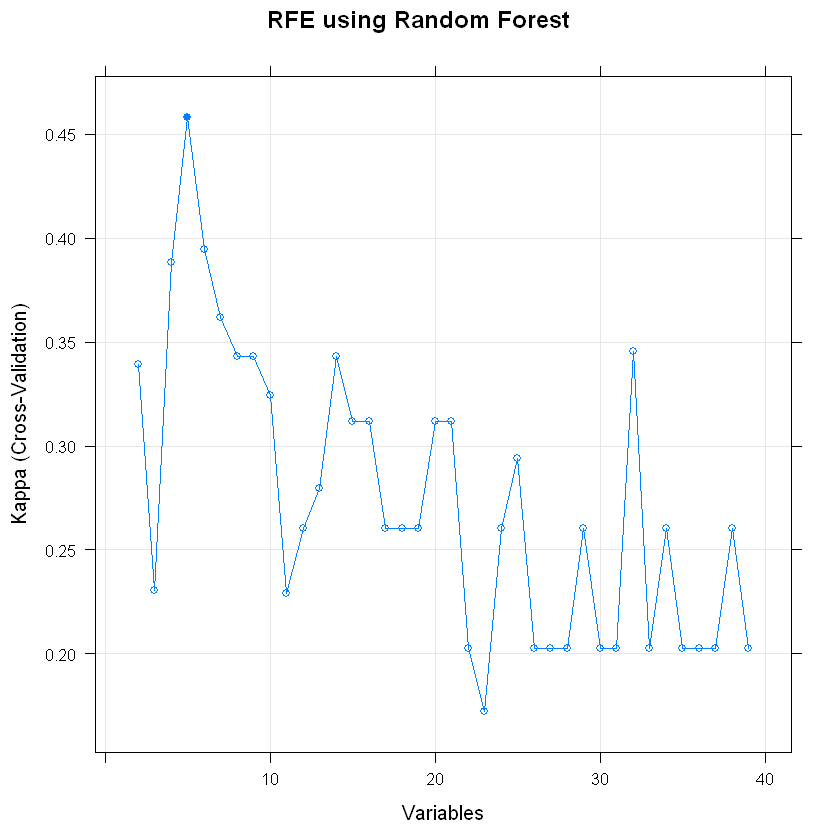

In [50]:
#install.packages("caret")
require(caret)
#install.packages("e1071")
require(e1071)
#install.packages("randomForest")
require(randomForest)
set.seed(1)
control <- rfeControl(functions=rfFuncs, method="cv", number=5)
set.seed(2)
results <- rfe(BD[,2:40], BD[[1]], sizes=c(2:40),rfeControl=control,metric="Kappa") #Classes desbalanceadas
print(results) 
#list the chosen features
predictors(results) 
#plot the results
plot(results, type=c("g", "o"),main="RFE using Random Forest")

Caidor,Berg,medicaçao_tipo_cardiovascular,DT_Sec,Anticoagulante_classif,Vo2_maximo_avaliado
<fct>,<dbl>,<fct>,<dbl>,<fct>,<dbl>
sim,54,Beta + Anti_Coag,9.1,não,17.0
não,54,Beta + Anti_Coag,8.6,não,11.3
sim,51,Beta + Anti_Coag + Diu,11.9,sim,12.7
sim,54,Beta,9.2,sim,18.4
não,55,Beta,8.7,sim,13.4
não,55,Beta,6.7,não,18.6


Random Forest 

52 samples
 5 predictor
 2 classes: 'sim', 'não' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 42, 41, 42, 41, 42 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
  2     0.7127273  0.3635833
  5     0.7127273  0.3593013
  8     0.6927273  0.3088665

Kappa was used to select the optimal model using the largest value.
The final value used for the model was mtry = 2.


Call:
 randomForest(x = x, y = y, mtry = min(param$mtry, ncol(x))) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 2

        OOB estimate of  error rate: 25%
Confusion matrix:
    sim não class.error
sim  12   7   0.3684211
não   6  27   0.1818182

rf variable importance

                                                    Overall
DT_Sec                                              100.000
Vo2_maximo_avaliado                                  96.538
Berg                                                 88.196
Anticoagulante_classifsim                            44.326
medicaçao_tipo_cardiovascularBeta + Anti_Coag + Diu  35.259
medicaçao_tipo_cardiovascularBeta + Anti_HAS         17.433
medicaçao_tipo_cardiovascularBeta + Anti_Coag         5.766
medicaçao_tipo_cardiovascularBeta                     0.000

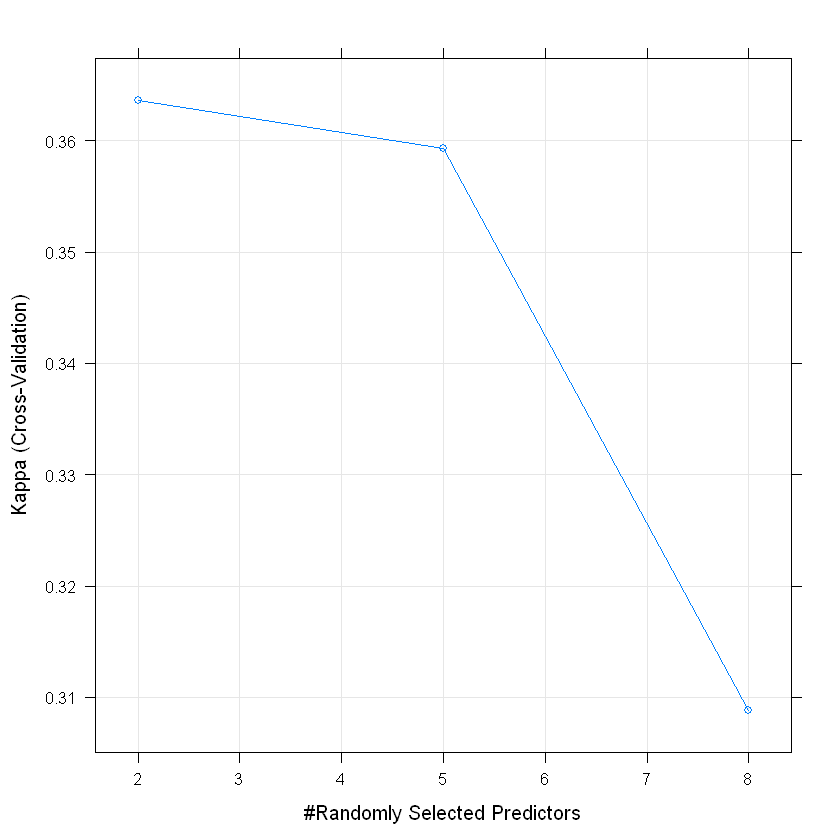

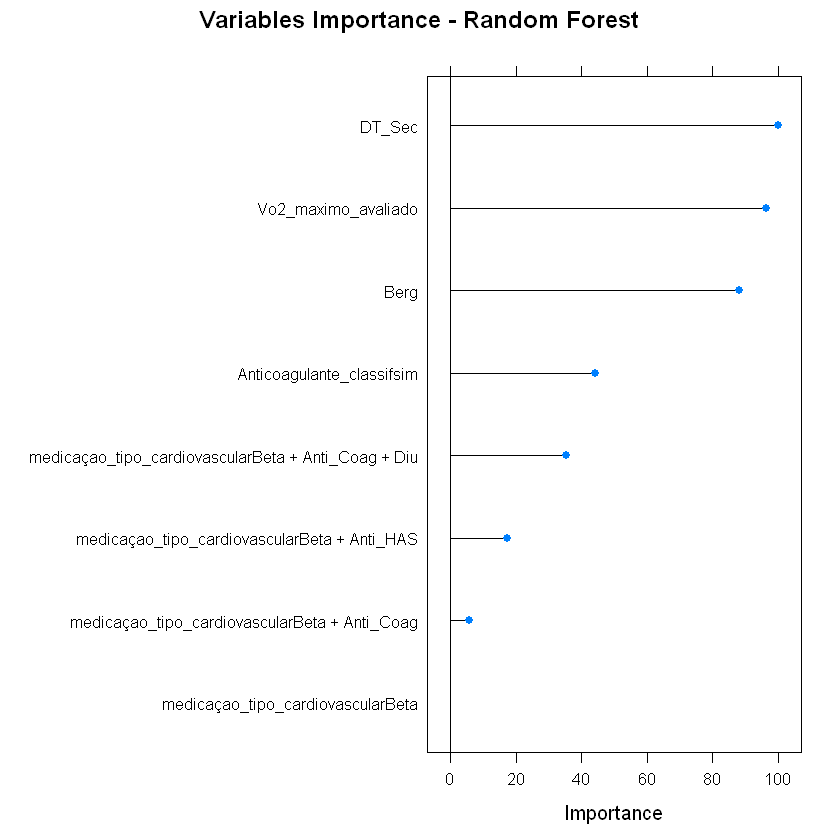

In [51]:
BD_RF_rfe<- BD[,c("Caidor","Berg",
                               "medicaçao_tipo_cardiovascular","DT_Sec","Anticoagulante_classif","Vo2_maximo_avaliado")]
head(BD_RF_rfe)
set.seed(4)
RFmodel=train(Caidor~.,data=BD_RF_rfe,method='rf',metric=ifelse(is.factor(BD_RF_rfe$Caidor),"Kappa","RMSE"),trControl=trainControl(method='cv',number=5,savePredictions=TRUE))
RFmodel 
plot(RFmodel)
RFmodel$finalModel  
varImp(RFmodel)
plot(varImp(RFmodel),main="Variables Importance - Random Forest")

In [98]:
#attributes(RFmodel)
prediction<-RFmodel$pred[,1]
obs<- RFmodel$pred[,2]
confusionMatrix(prediction,obs)

Confusion Matrix and Statistics

          Reference
Prediction sim não
       sim  29  18
       não  28  81
                                          
               Accuracy : 0.7051          
                 95% CI : (0.6269, 0.7753)
    No Information Rate : 0.6346          
    P-Value [Acc > NIR] : 0.03888         
                                          
                  Kappa : 0.3396          
                                          
 Mcnemar's Test P-Value : 0.18452         
                                          
            Sensitivity : 0.5088          
            Specificity : 0.8182          
         Pos Pred Value : 0.6170          
         Neg Pred Value : 0.7431          
             Prevalence : 0.3654          
         Detection Rate : 0.1859          
   Detection Prevalence : 0.3013          
      Balanced Accuracy : 0.6635          
                                          
       'Positive' Class : sim             
                              

# Otimizando a métrica de interesse usando *f-beta* e *ROC* 

## F-beta

In [77]:
# Objetivo: diminuir os Falsos Negativos (indivíduos classificados, de forma errada, como caidor)
# Aumentar o valor de Beta (>1 - prioriza o recall)

#install.packages("Metrics")
require(Metrics)
#Como calcular fbeta de um modelo de RF(modelo 1 - caidor como classe positiva):
obs<- RFmodel$pred[,2]
obs<- as.numeric(obs)
pred<- RFmodel$pred[,1]
pred<- as.numeric(pred)
fbeta_score(obs,pred,beta= seq(0,1,0.1))

[1] 1.382979 1.383973 1.386851 1.391318 1.396966 1.403353 1.410074 1.416801
 [9] 1.423298 1.429414 1.435065

In [85]:
#install.packages("MLmetrics")
require(MLmetrics)

#F-BETA
fbeta <- function (data, lev = NULL, model = NULL) {
  fb_val <- FBeta_Score(data$obs, data$pred, beta=1.5)
  c(FB = fb_val)
}
set.seed(3)
RF_fbeta <- train(Caidor~., 
                     data = BD_RF_rfe,
                     method = "rf",
                     metric = "FB",
                     trControl = trainControl(method='cv',number=5,savePredictions=TRUE,search="grid",summaryFunction=fbeta))
RF_fbeta
RF_fbeta$finalModel

Random Forest 

52 samples
 5 predictor
 2 classes: 'sim', 'não' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 43, 41, 42, 41, 41 
Resampling results across tuning parameters:

  mtry  FB       
  2     0.6886905
  5     0.5495238
  8     0.6027056

FB was used to select the optimal model using the largest value.
The final value used for the model was mtry = 2.


Call:
 randomForest(x = x, y = y, mtry = min(param$mtry, ncol(x))) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 2

        OOB estimate of  error rate: 26.92%
Confusion matrix:
    sim não class.error
sim  11   8   0.4210526
não   6  27   0.1818182

rf variable importance

                                                    Overall
Vo2_maximo_avaliado                                 100.000
DT_Sec                                               94.561
Berg                                                 93.909
medicaçao_tipo_cardiovascularBeta + Anti_Coag + Diu  36.426
Anticoagulante_classifsim                            35.987
medicaçao_tipo_cardiovascularBeta + Anti_HAS         17.390
medicaçao_tipo_cardiovascularBeta + Anti_Coag         7.764
medicaçao_tipo_cardiovascularBeta                     0.000

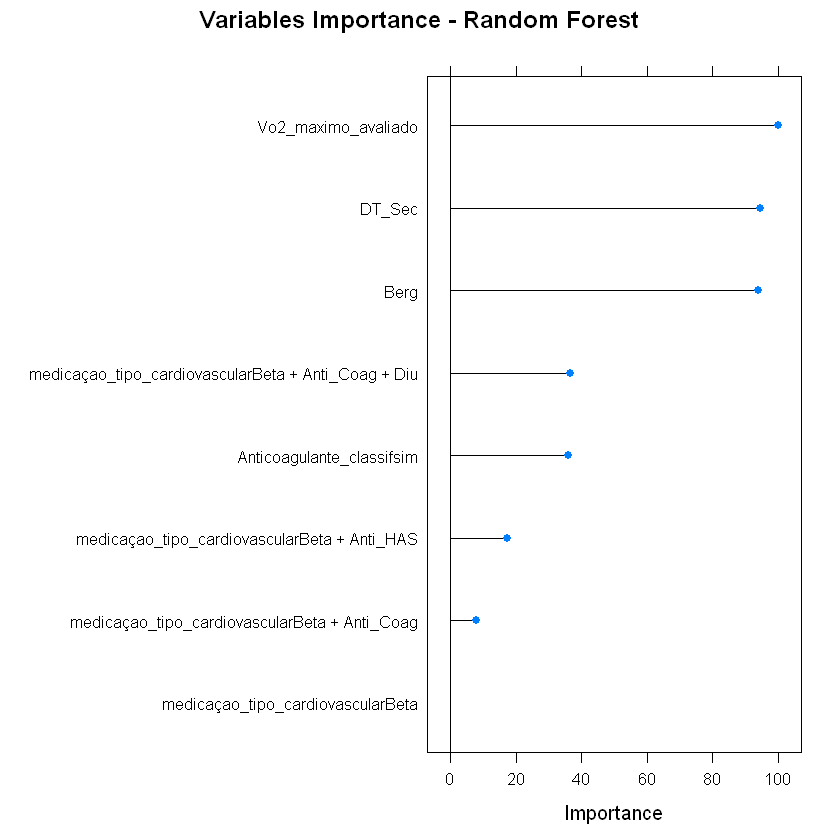

In [86]:
varImp(RF_fbeta)
plot(varImp(RF_fbeta),main="Variables Importance - Random Forest")

In [87]:
prediction2<-RF_fbeta$pred[,1]
obs2<- RF_fbeta$pred[,2]
confusionMatrix(prediction2,obs2)

Confusion Matrix and Statistics

          Reference
Prediction sim não
       sim  34  18
       não  23  81
                                          
               Accuracy : 0.7372          
                 95% CI : (0.6608, 0.8043)
    No Information Rate : 0.6346          
    P-Value [Acc > NIR] : 0.004261        
                                          
                  Kappa : 0.4225          
                                          
 Mcnemar's Test P-Value : 0.532171        
                                          
            Sensitivity : 0.5965          
            Specificity : 0.8182          
         Pos Pred Value : 0.6538          
         Neg Pred Value : 0.7788          
             Prevalence : 0.3654          
         Detection Rate : 0.2179          
   Detection Prevalence : 0.3333          
      Balanced Accuracy : 0.7073          
                                          
       'Positive' Class : sim             
                              

## ROC

In [57]:
#twoClassSummary (Sensibilidade, especificidade e AUC ROC)
fitControl <- trainControl(method = "cv",
                           number = 5,
                           savePredictions=TRUE,
                           search="grid",
                           # estimar probabilidades das classes
                           classProbs = TRUE,
                           # avaliar performance utilizando função a seguir
                           summaryFunction = twoClassSummary)

set.seed(13)
RF_roc <- train(Caidor ~ ., data = BD_RF_rfe, 
                 method = "rf", 
                 trControl = fitControl, 
                 # especificando qual métrica deseja otimizar
                 metric = "ROC")
RF_roc
RF_roc$finalModel

Random Forest 

52 samples
 5 predictor
 2 classes: 'sim', 'não' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 41, 42, 42, 42, 41 
Resampling results across tuning parameters:

  mtry  ROC        Sens       Spec     
  2     0.8535714  0.6500000  0.8142857
  5     0.8440476  0.5833333  0.8142857
  8     0.8452381  0.6000000  0.7857143

ROC was used to select the optimal model using the largest value.
The final value used for the model was mtry = 2.


Call:
 randomForest(x = x, y = y, mtry = min(param$mtry, ncol(x))) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 2

        OOB estimate of  error rate: 25%
Confusion matrix:
    sim não class.error
sim  12   7   0.3684211
não   6  27   0.1818182

rf variable importance

                                                    Overall
DT_Sec                                              100.000
Vo2_maximo_avaliado                                  97.388
Berg                                                 89.717
medicaçao_tipo_cardiovascularBeta + Anti_Coag + Diu  39.902
Anticoagulante_classifsim                            38.256
medicaçao_tipo_cardiovascularBeta + Anti_HAS         21.917
medicaçao_tipo_cardiovascularBeta + Anti_Coag         7.934
medicaçao_tipo_cardiovascularBeta                     0.000

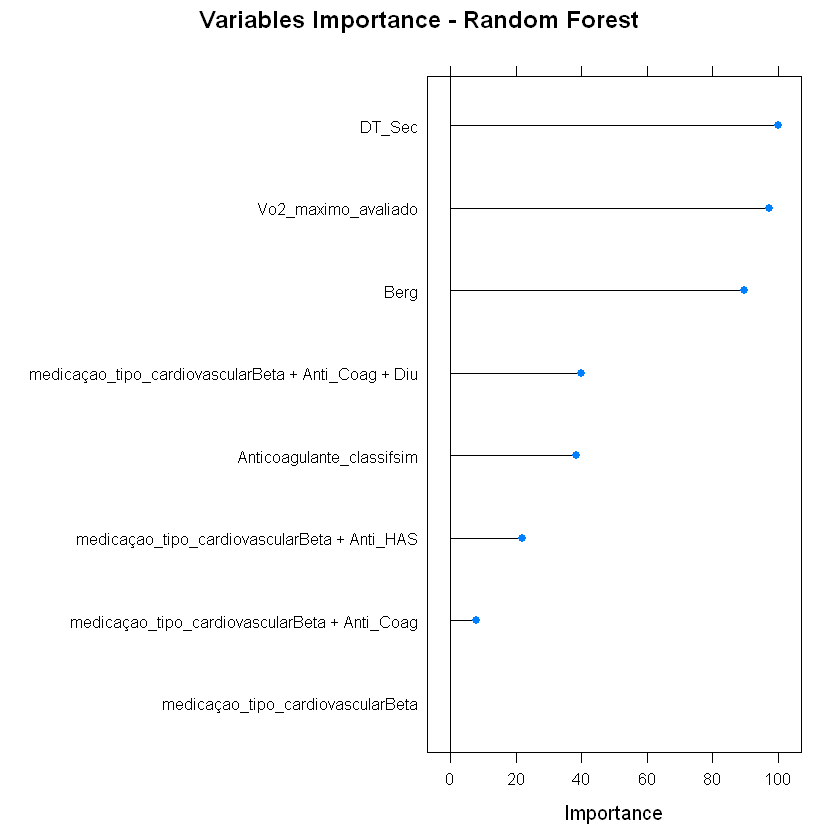

In [58]:
varImp(RF_roc)
plot(varImp(RF_roc),main="Variables Importance - Random Forest")

In [59]:
prediction3<-RF_roc$pred[,1]
obs3<- RF_roc$pred[,2]
confusionMatrix(prediction3,obs3)

Confusion Matrix and Statistics

          Reference
Prediction sim não
       sim  34  19
       não  23  80
                                         
               Accuracy : 0.7308         
                 95% CI : (0.654, 0.7986)
    No Information Rate : 0.6346         
    P-Value [Acc > NIR] : 0.007028       
                                         
                  Kappa : 0.4107         
                                         
 Mcnemar's Test P-Value : 0.643429       
                                         
            Sensitivity : 0.5965         
            Specificity : 0.8081         
         Pos Pred Value : 0.6415         
         Neg Pred Value : 0.7767         
             Prevalence : 0.3654         
         Detection Rate : 0.2179         
   Detection Prevalence : 0.3397         
      Balanced Accuracy : 0.7023         
                                         
       'Positive' Class : sim            
                                         

# Comparando os 3 modelos (*Curva ROC*) - caso como classe positiva

Setting levels: control = 1, case = 2

Setting direction: controls < cases




Call:
roc.default(response = obs, predictor = y, plot = T)

Data: y in 57 controls (obs 1) < 99 cases (obs 2).
Area under the curve: 0.6635

Setting levels: control = sim, case = não

Setting direction: controls < cases



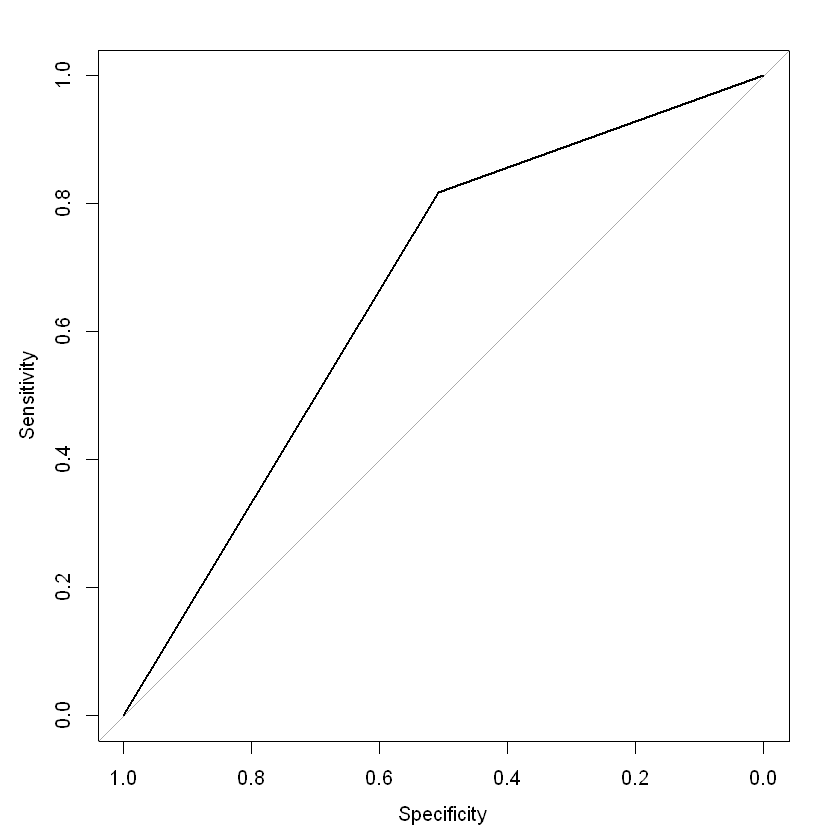


Call:
roc.default(response = obs2, predictor = y2, plot = T)

Data: y2 in 57 controls (obs2 sim) < 99 cases (obs2 não).
Area under the curve: 0.7073


	DeLong's test for two ROC curves

data:  roc_rf and roc_fbeta
D = -0.80763, df = 309.94, p-value = 0.4199
alternative hypothesis: true difference in AUC is not equal to 0
sample estimates:
AUC of roc1 AUC of roc2 
  0.6634769   0.7073365 


Setting levels: control = sim, case = não

Setting direction: controls < cases



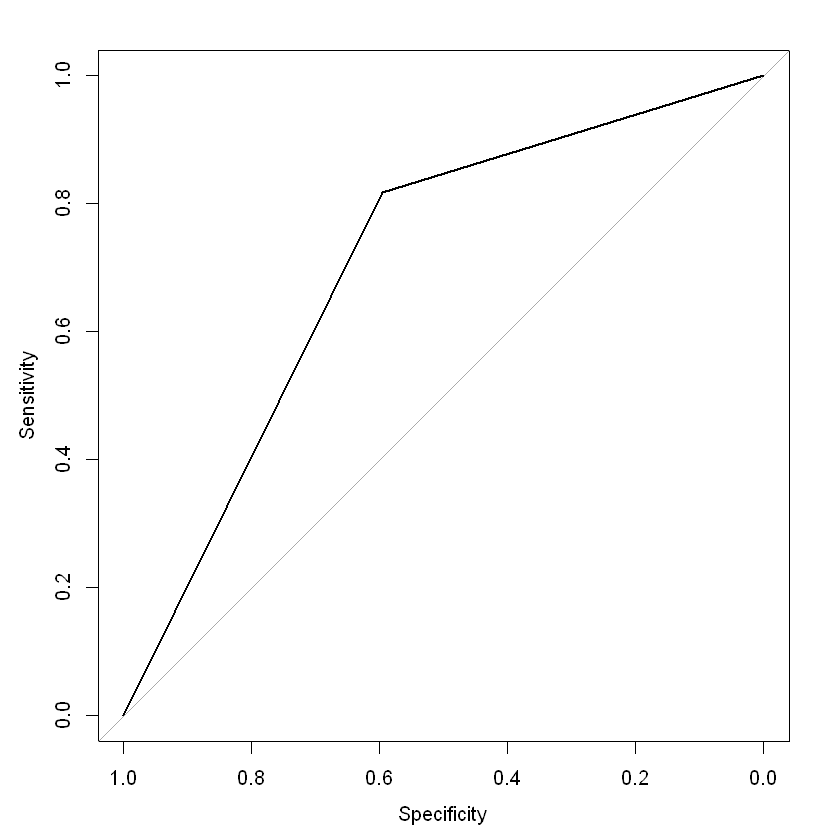


Call:
roc.default(response = obs3, predictor = y3, plot = T)

Data: y3 in 57 controls (obs3 sim) < 99 cases (obs3 não).
Area under the curve: 0.7023


	DeLong's test for two ROC curves

data:  roc_rf and auc_roc
D = -0.71268, df = 309.98, p-value = 0.4766
alternative hypothesis: true difference in AUC is not equal to 0
sample estimates:
AUC of roc1 AUC of roc2 
  0.6634769   0.7022860 



	DeLong's test for two ROC curves

data:  roc_fbeta and auc_roc
D = 0.093398, df = 309.99, p-value = 0.9256
alternative hypothesis: true difference in AUC is not equal to 0
sample estimates:
AUC of roc1 AUC of roc2 
  0.7073365   0.7022860 


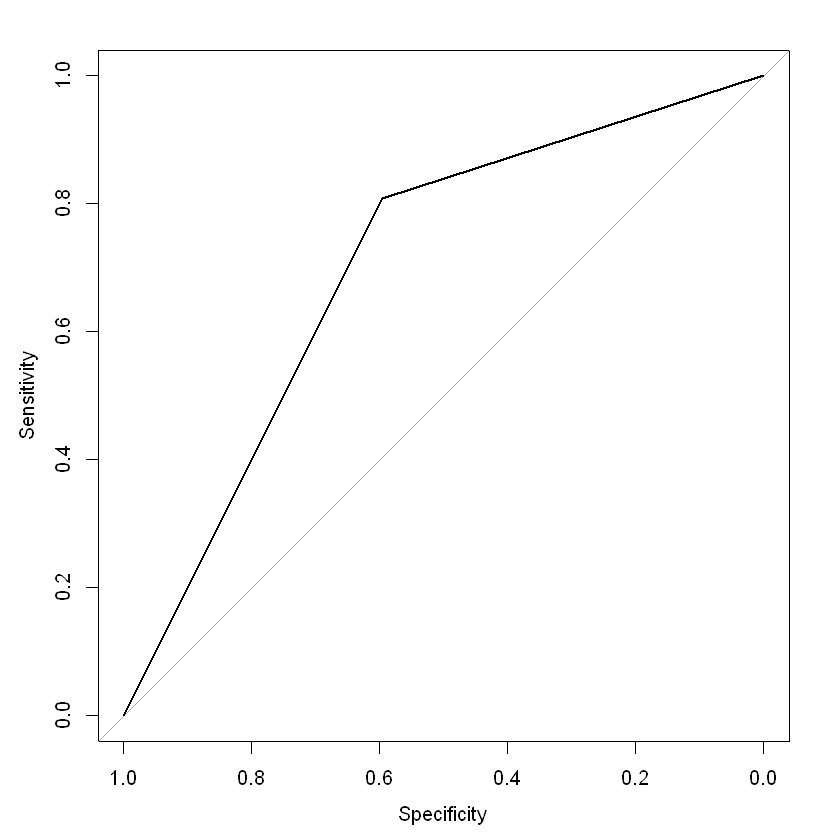

In [94]:
#install.packages("pROC")
require(pROC)

y<- as.numeric(prediction)
roc_rf<- roc(obs, y, plot=T)
roc_rf

y2<- as.numeric(prediction2)
roc_fbeta<- roc(obs2, y2, plot=T)
roc_fbeta

roc.test(roc_rf,roc_fbeta)

y3<- as.numeric(prediction3)
auc_roc<- roc(obs3,y3,plot=T)
auc_roc

roc.test(roc_rf,auc_roc)
###
roc.test(roc_fbeta,auc_roc)

# Regressão Logística (*Berg, DT_Sec e Vo2_maximo_avaliado*) 

In [112]:
set.seed(321)
logistic_model<- glm(Caidor ~ Vo2_maximo_avaliado+DT_Sec+Berg,data=BD_RF_rfe, family = 'binomial')
summary(logistic_model)
#Razão de chances
OR<- exp(coef(logistic_model)) 
OR
#Intervalo de confiança
exp(cbind(OR=coef(logistic_model), confint(logistic_model)))


Call:
glm(formula = Caidor ~ Vo2_maximo_avaliado + DT_Sec + Berg, family = "binomial", 
    data = BD_RF_rfe)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.0472  -0.5084   0.4998   0.6539   2.2521  

Coefficients:
                     Estimate Std. Error z value Pr(>|z|)  
(Intercept)         -28.09278   11.19157  -2.510   0.0121 *
Vo2_maximo_avaliado   0.07672    0.11381   0.674   0.5003  
DT_Sec               -0.15461    0.15198  -1.017   0.3090  
Berg                  0.53017    0.21228   2.497   0.0125 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 68.271  on 51  degrees of freedom
Residual deviance: 46.541  on 48  degrees of freedom
AIC: 54.541

Number of Fisher Scoring iterations: 5


(Intercept) Vo2_maximo_avaliado              DT_Sec                Berg 
       6.301745e-13        1.079736e+00        8.567455e-01        1.699215e+00

Waiting for profiling to be done...



,OR,2.5 %,97.5 %
(Intercept),6.301745e-13,5.306608e-25,3.195353e-05
Vo2_maximo_avaliado,1.079736e+00,8.677334e-01,1.367187e+00
DT_Sec,8.567455e-01,5.958264e-01,1.133468e+00
Berg,1.699215e+00,1.217957e+00,2.879131e+00


Installing package into 'C:/Users/usernote/Documents/R/win-library/3.6'
(as 'lib' is unspecified)




  There is a binary version available but the source version is later:
       binary source needs_compilation
modEvA    2.0    3.0             FALSE



installing the source package 'modEvA'


Loading required package: modEvA


Attaching package: 'modEvA'


The following object is masked from 'package:MLmetrics':

    AUC




$CoxSnell
[1] 0.3415681

$Nagelkerke
[1] 0.4672849

$McFadden
[1] 0.3182968

$Tjur
[1] 0.3825534

$sqPearson
[1] 0.3818146

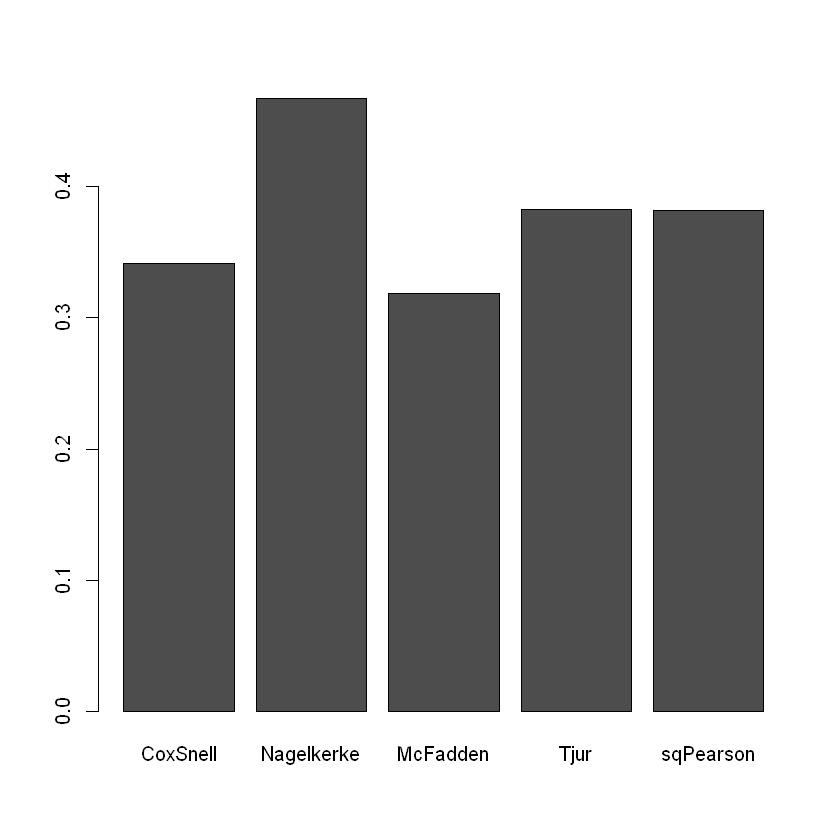

In [121]:
#Pseudo R2
#Fontes: https://smolski.github.io/livroavancado/reglog.html e https://www.rdocumentation.org/packages/modEvA/versions/3.0/topics/RsqGLM
install.packages("modEvA")
require(modEvA)
RsqGLM(logistic_model)

# Análise não supervisionada (*não será aproveitada no atual artigo*)

## One hot encode

In [122]:
#One hot enconding
#require(caret)
BD2<- BD[,-1]
dummy <- dummyVars(" ~ .", data = BD2) #Mais rápido do que one_hot() do pacote mltools
BD_transformado <- data.frame(predict(dummy, newdata = BD2))
head(BD_transformado)
dim(BD_transformado) #Aumentou de 40 para 73 variáveis preditoras
str(BD_transformado)

,Genero.homem,Genero.mulher,idade,Nivel_social.a,Nivel_social.b,Nivel_social.c,Nivel_social.d,etnia.branco,etnia.preto,Nivel_educacional,...,Flexibilidade_MI,TUG_sec,DT_Sec,DT_numero_animais,quantidade_total_de_medicação,medicaçao_tipo_cardiovascular.Anti...HAS,medicaçao_tipo_cardiovascular.Beta,medicaçao_tipo_cardiovascular.Beta...Anti_Coag,medicaçao_tipo_cardiovascular.Beta...Anti_Coag...Diu,medicaçao_tipo_cardiovascular.Beta...Anti_HAS
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,1,76,0,1,0,0,1,0,16,...,-33,8.90,9.1,10,8,0,0,1,0,0
2,0,1,75,0,0,1,0,1,0,12,...,-15,7.42,8.6,7,6,0,0,1,0,0
3,0,1,83,0,1,0,0,1,0,10,...,-4,10.52,11.9,7,8,0,0,0,1,0
4,0,1,83,0,1,0,0,0,1,20,...,-5,8.03,9.2,8,2,0,1,0,0,0
5,0,1,82,0,1,0,0,1,0,8,...,-2,8.91,8.7,7,5,0,1,0,0,0
6,0,1,78,0,0,1,0,1,0,14,...,8,5.66,6.7,5,6,0,1,0,0,0


[1] 52 73

'data.frame':	52 obs. of  73 variables:
 $ Genero.homem                                        : num  0 0 0 0 0 0 1 1 1 1 ...
 $ Genero.mulher                                       : num  1 1 1 1 1 1 0 0 0 0 ...
 $ idade                                               : num  76 75 83 83 82 78 75 78 79 84 ...
 $ Nivel_social.a                                      : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Nivel_social.b                                      : num  1 0 1 1 1 0 1 0 1 1 ...
 $ Nivel_social.c                                      : num  0 1 0 0 0 1 0 1 0 0 ...
 $ Nivel_social.d                                      : num  0 0 0 0 0 0 0 0 0 0 ...
 $ etnia.branco                                        : num  1 1 1 0 1 1 1 1 1 1 ...
 $ etnia.preto                                         : num  0 0 0 1 0 0 0 0 0 0 ...
 $ Nivel_educacional                                   : num  16 12 10 20 8 14 16 16 22 20 ...
 $ Freq_atividade.2x                                   : num  0 1 0 0 1 1 1 0 0 0

## PCA

,eigenvalue,variance.percent,cumulative.variance.percent
,<dbl>,<dbl>,<dbl>
Dim.1,5.672710e+03,8.777631e+01,87.77631
Dim.2,2.806829e+02,4.343128e+00,92.11944
Dim.3,1.665209e+02,2.576650e+00,94.69609
Dim.4,9.097366e+01,1.407675e+00,96.10376
Dim.5,6.483219e+01,1.003177e+00,97.10694
Dim.6,4.629328e+01,7.163160e-01,97.82325
Dim.7,3.423086e+01,5.296690e-01,98.35292
Dim.8,2.570214e+01,3.977004e-01,98.75062
Dim.9,2.305182e+01,3.566908e-01,99.10731


Warning message:
"ggrepel: 68 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


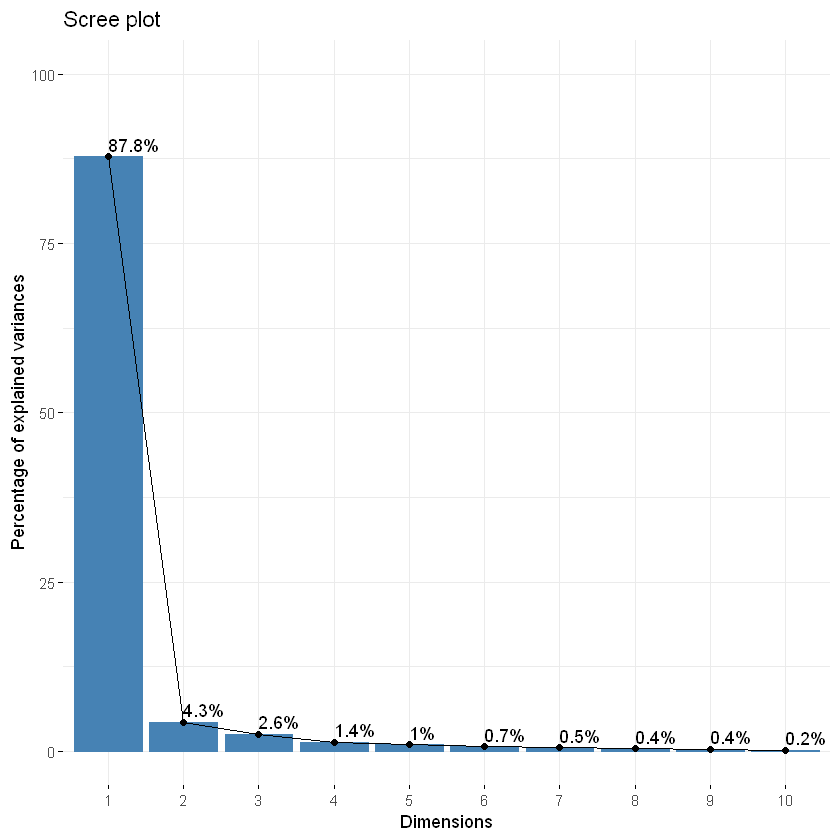

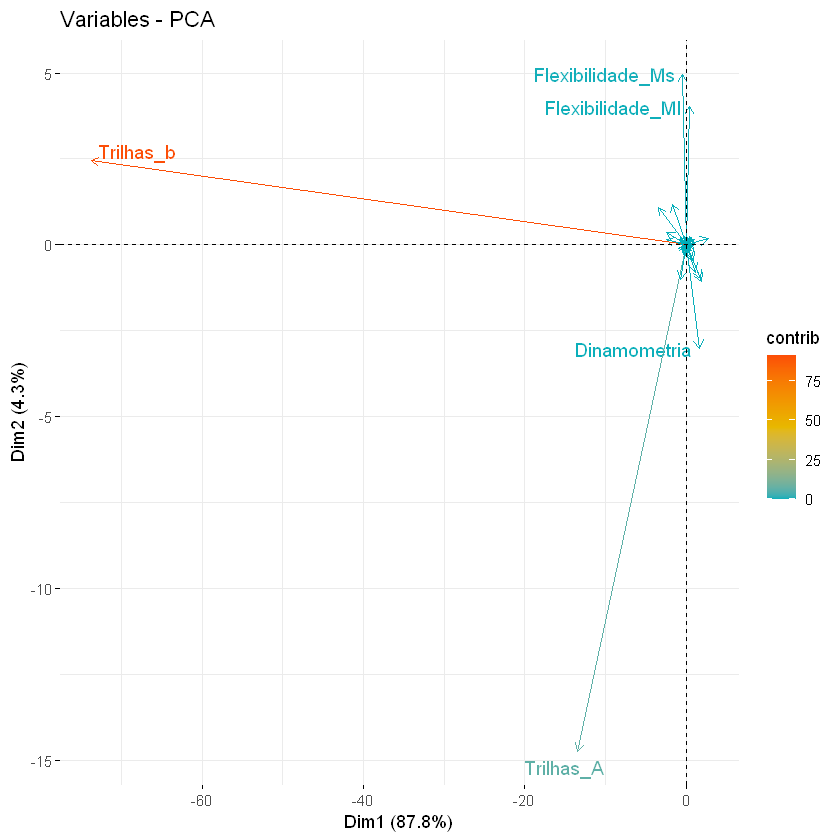

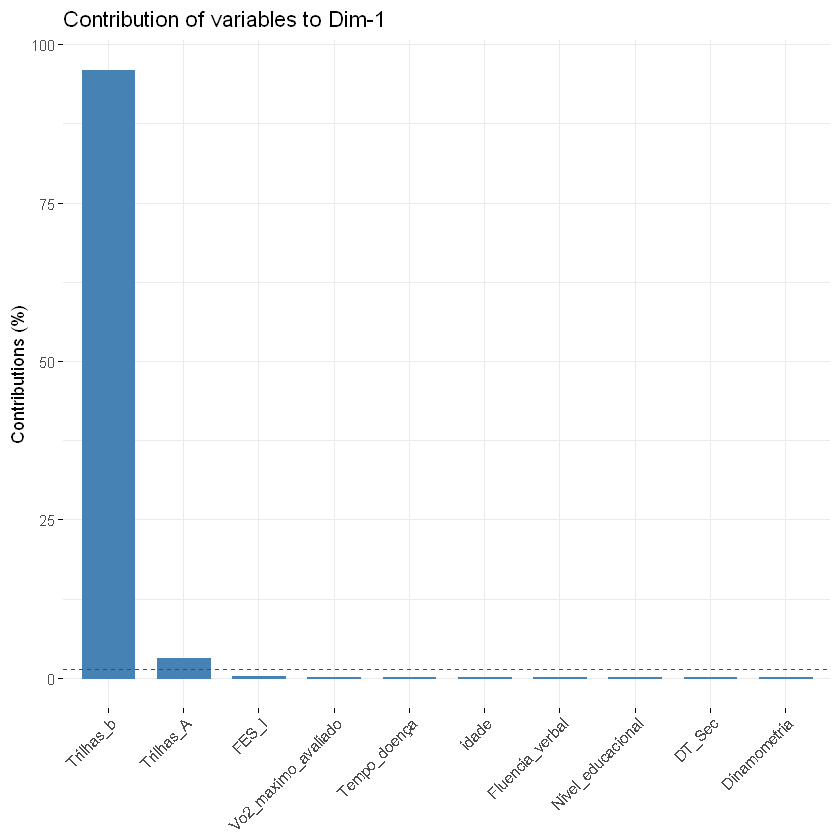

Warning message:
"ggrepel: 21 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


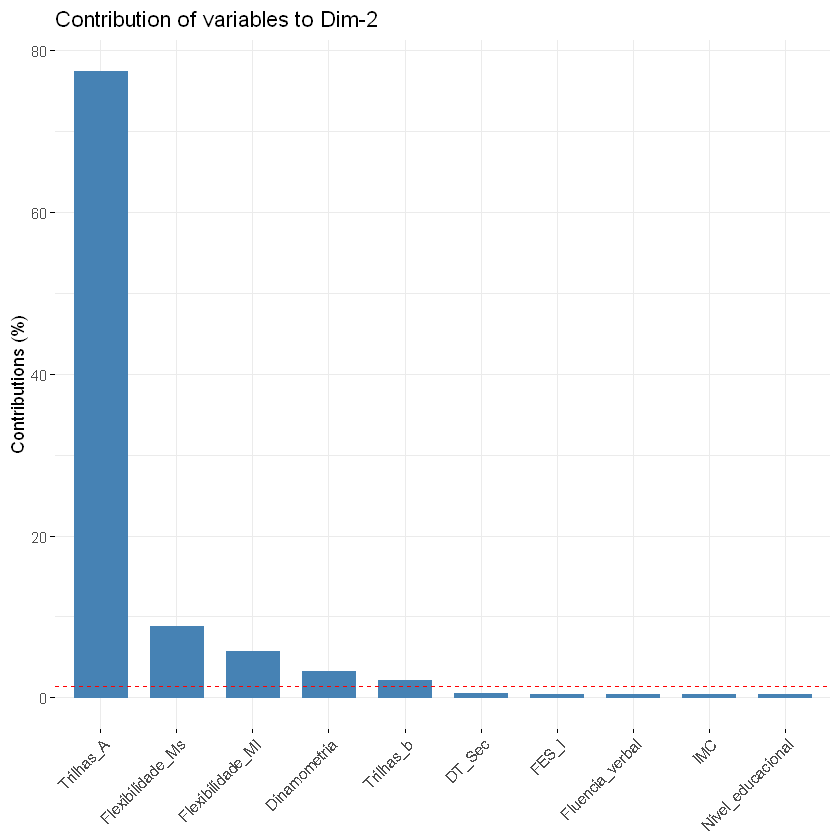

Warning message:
"ggrepel: 47 unlabeled data points (too many overlaps). Consider increasing max.overlaps"
Warning message:
"ggrepel: 68 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


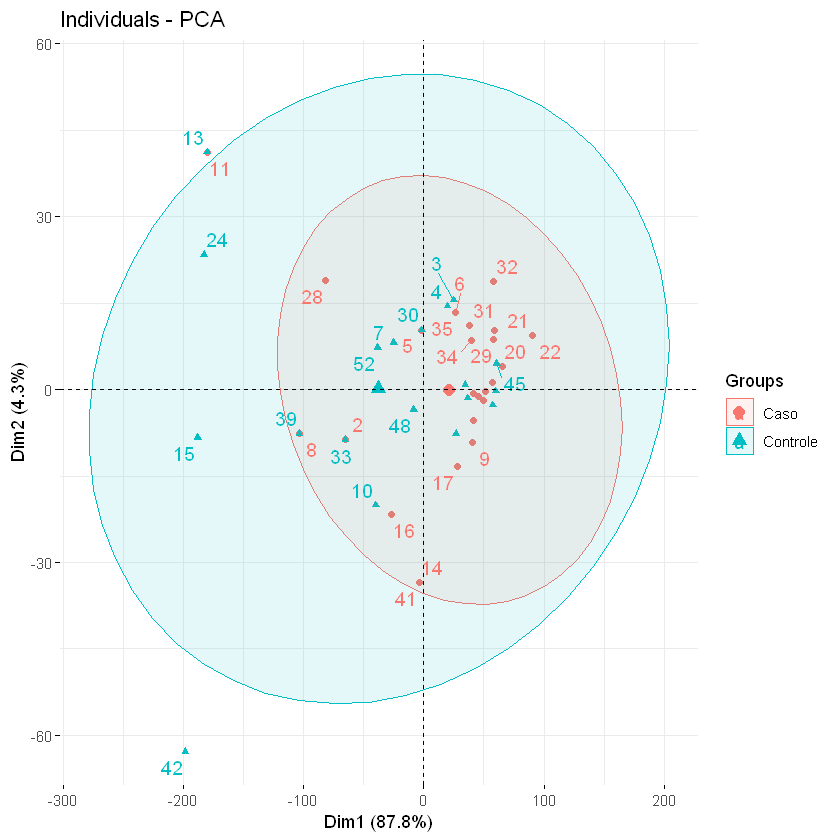

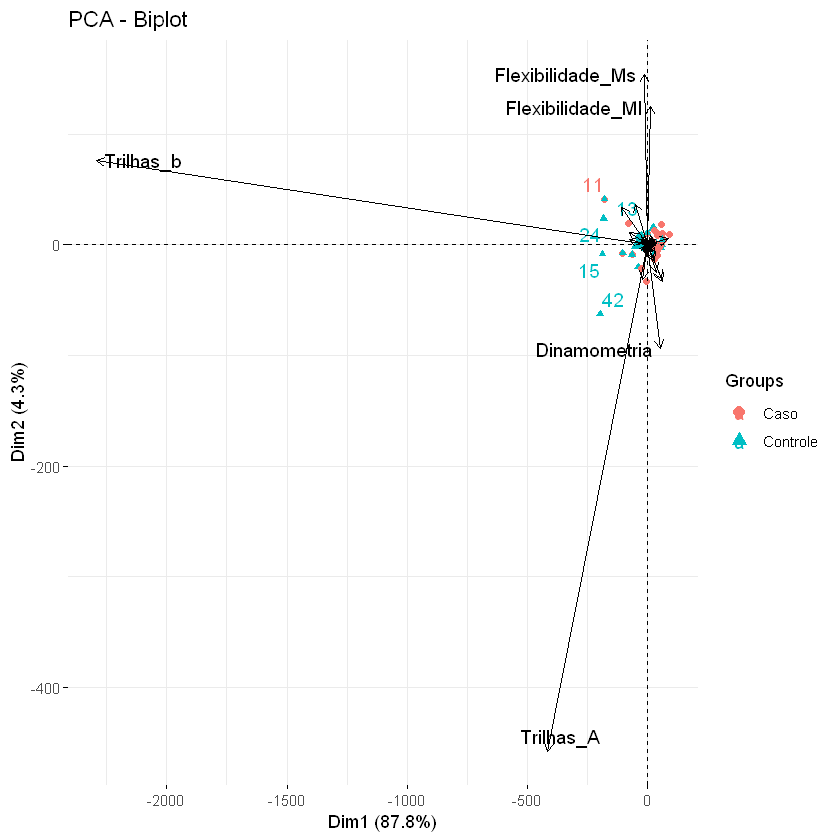

In [97]:
#install.packages("FactoMineR")
#install.packages("factoextra")
require(FactoMineR)
require(factoextra)
PCA<- prcomp(BD_transformado,scale. = F)
eig.val<- get_eigenvalue(PCA)
eig.val
#Scree plot
fviz_eig(PCA,addlabels = T,ylim=c(0,100))
#Extrair os resultados das variáveis do PCA p/ plotar no gráfico
var<- get_pca_var(PCA)
ind<- get_pca_ind(PCA)
fviz_pca_var(PCA,col.var="contrib",gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),repel = T)
#Contribuição das variáveis para a 1ª e 2ª dimensão (Top 10)
fviz_contrib(PCA, choice = "var", axes = 1, top = 10) 
fviz_contrib(PCA, choice = "var", axes = 2, top = 10)
#Criar grupos p/ ajudar na visualização do gráfico
Labels= BD$Caidor
Labels<- as.numeric(Labels)
Labels[Labels==1]<- "Controle"
Labels[Labels==2]<- "Caso"
Labels<- as.factor(Labels)
fviz_pca_ind(PCA,geom= c("point","text"),habillage = Labels,addEllipses = T,repel=TRUE)
fviz_pca_biplot(PCA, repel = TRUE,col.var = "black",habillage = Labels)  

# RFE-DT (*teste*)

Loading required package: rpart




Recursive feature selection

Outer resampling method: Cross-Validated (5 fold) 

Resampling performance over subset size:

 Variables Accuracy  Kappa AccuracySD KappaSD Selected
         2   0.6893 0.3017    0.13123  0.2965         
         3   0.6915 0.2861    0.09918  0.2317         
         4   0.6533 0.2106    0.07999  0.1985         
         5   0.6756 0.2561    0.09802  0.2550         
         6   0.6756 0.2361    0.14834  0.3812         
         7   0.6493 0.2090    0.07672  0.1941         
         8   0.6533 0.1659    0.07999  0.2554         
         9   0.7301 0.3800    0.08212  0.2393         
        10   0.7683 0.4787    0.05342  0.1247        *
        11   0.6897 0.2698    0.12490  0.3163         
        12   0.6733 0.2707    0.07571  0.1496         
        13   0.6857 0.2915    0.12432  0.2923         
        14   0.7119 0.3391    0.06628  0.1963         
        15   0.6897 0.2754    0.05659  0.1821         
        16   0.7079 0.3214    0.08102  0.2355      

[1] "medicaçao_tipo_cardiovascular" "Berg"                         
 [3] "Vo2_maximo_avaliado"           "DT_Sec"                       
 [5] "Trilhas_b"                     "Fluencia_verbal"              
 [7] "DVC_primaria"                  "Dinamometria"                 
 [9] "Anticoagulante_classif"        "idade"

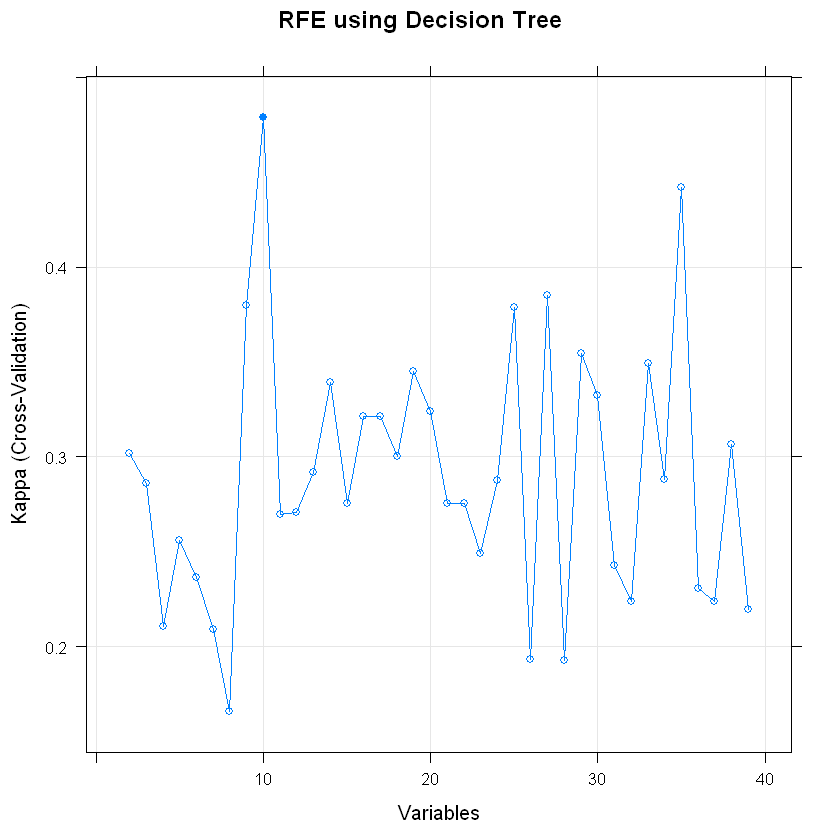

In [123]:
#install.packages("caret")
#require(caret)
#install.packages("e1071")
#require(e1071)
#install.packages("rpart")
require(rpart)
set.seed(1)
control2 <- rfeControl(functions=treebagFuncs, method="cv", number=5)
set.seed(2)
results2 <- rfe(BD[,2:40], BD[[1]], sizes=c(2:40),rfeControl=control2,metric="Kappa") #Classes desbalanceadas
print(results2) 
#list the chosen features
predictors(results2) 
#plot the results
plot(results2, type=c("g", "o"),main="RFE using Decision Tree")

CART 

52 samples
10 predictors
 2 classes: 'sim', 'não' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 42, 41, 41, 42, 42 
Resampling results across tuning parameters:

  cp          Accuracy   Kappa    
  0.00000000  0.6745455  0.2591570
  0.05263158  0.6745455  0.2591570
  0.42105263  0.6363636  0.1300174

Kappa was used to select the optimal model using the largest value.
The final value used for the model was cp = 0.05263158.

n= 52 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

1) root 52 19 não (0.3653846 0.6346154)  
  2) Berg< 53 10  1 sim (0.9000000 0.1000000) *
  3) Berg>=53 42 10 não (0.2380952 0.7619048) *

Loading required package: rpart.plot



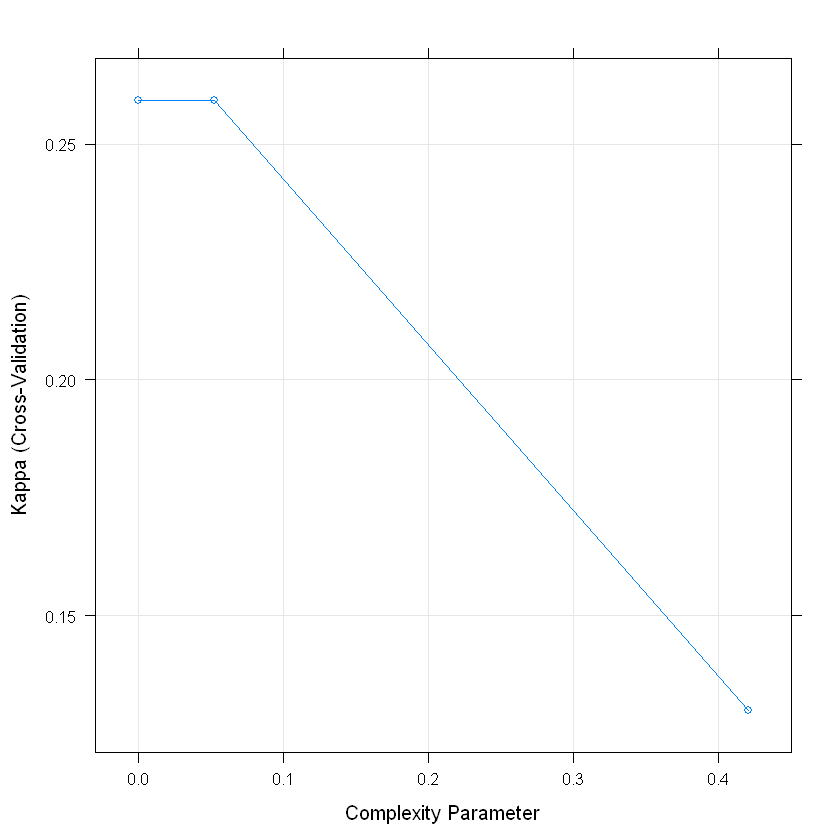

Confusion Matrix and Statistics

          Reference
Prediction sim não
       sim  21  17
       não  36  82
                                          
               Accuracy : 0.6603          
                 95% CI : (0.5802, 0.7341)
    No Information Rate : 0.6346          
    P-Value [Acc > NIR] : 0.28205         
                                          
                  Kappa : 0.2117          
                                          
 Mcnemar's Test P-Value : 0.01342         
                                          
            Sensitivity : 0.3684          
            Specificity : 0.8283          
         Pos Pred Value : 0.5526          
         Neg Pred Value : 0.6949          
             Prevalence : 0.3654          
         Detection Rate : 0.1346          
   Detection Prevalence : 0.2436          
      Balanced Accuracy : 0.5984          
                                          
       'Positive' Class : sim             
                              

rpart variable importance

                                                      Overall
Berg                                                   100.00
Vo2_maximo_avaliado                                     95.86
Trilhas_b                                               81.93
medicaçao_tipo_cardiovascularBeta + Anti_Coag + Diu     80.65
DT_Sec                                                  74.40
DVC_primariainsuficiencia                                0.00
Anticoagulante_classifsim                                0.00
`medicaçao_tipo_cardiovascularBeta + Anti_Coag + Diu`    0.00
DVC_primariaisquemia                                     0.00
DVC_primariaangina                                       0.00
idade                                                    0.00
`medicaçao_tipo_cardiovascularBeta + Anti_HAS`           0.00
DVC_primariaarritmia                                     0.00
Fluencia_verbal                                          0.00
DVC_primarianada                           

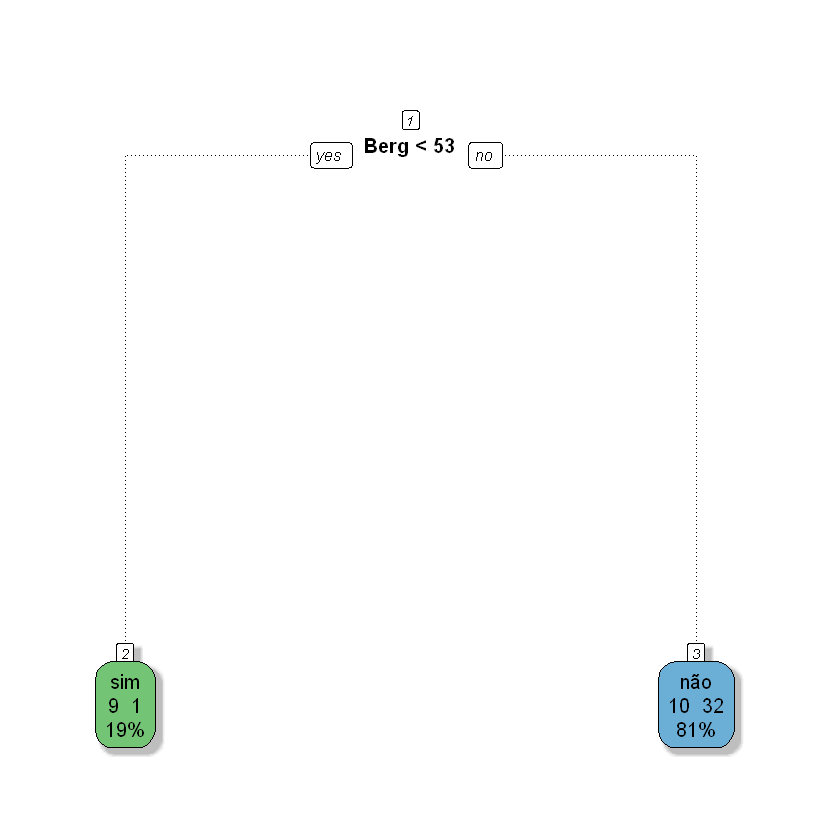

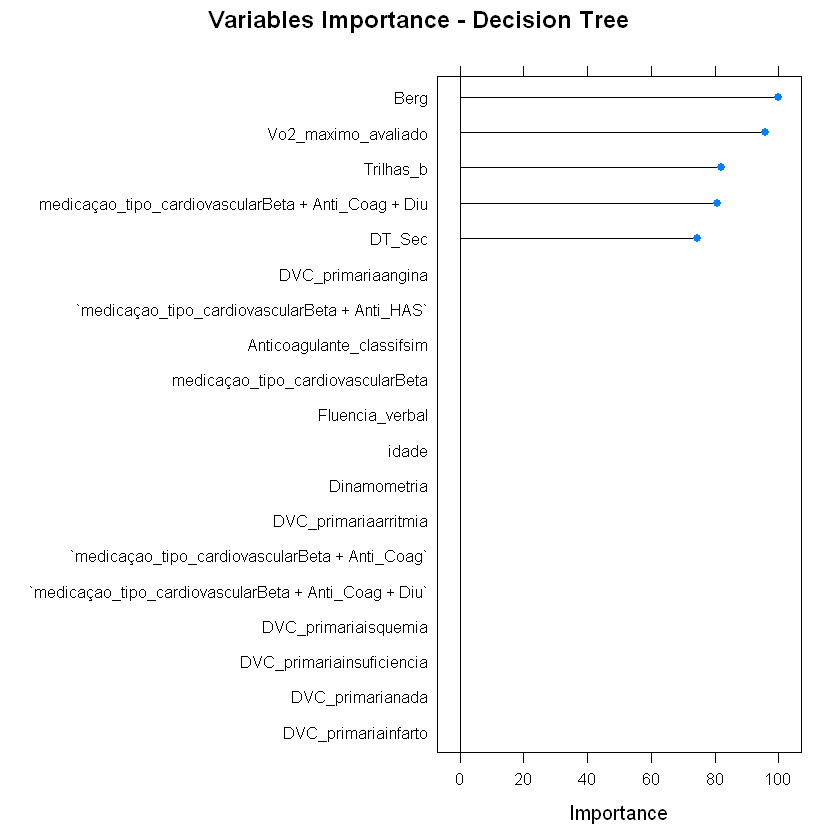

In [124]:
BD_DT_rfe<- BD[,c("Caidor","medicaçao_tipo_cardiovascular","Berg","Vo2_maximo_avaliado",
                                "DT_Sec","Trilhas_b","Fluencia_verbal","DVC_primaria","Dinamometria","Anticoagulante_classif","idade")]
set.seed(44)
Tree_model=train(Caidor~.,data=BD_DT_rfe,method='rpart',metric="Kappa",trControl=trainControl(method='cv',number=5,savePredictions=TRUE))
Tree_model 
plot(Tree_model)
Tree_model$finalModel
#install.packages("rpart.plot")
require(rpart.plot)
rpart.plot(Tree_model$finalModel,type=0,extra=101,box.palette = "GnBu",
           branch.lty=3,shadow.col = "gray",nn=T,cex=1) 

#attributes(Tree_model)
prediction_dt<-Tree_model$pred[,1]
obs_dt<- Tree_model$pred[,2]
confusionMatrix(prediction_dt,obs_dt)
varImp(Tree_model)
plot(varImp(Tree_model),main="Variables Importance - Decision Tree")